# Load Data

In [ ]:
!pip install -U keras


In [1]:
# imports
%matplotlib inline

import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import string
import re

from gensim import corpora
from gensim.models import Phrases
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#from ds_voc.text_processing import TextProcessing

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer

In [12]:
file = 'incident_data.csv'
import pandas as pd

with open(file,'r', encoding='cp1252') as f:
    df = pd.read_csv(f, dtype={'state':str})
#print(df.shape)
    

#df.SentimentText = df.SentimentText.astype(str)


In [13]:
#df.head(5)
#df = pd.read_csv('incident_data.csv', encoding='utf-8',dtype={'state':str})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79807 entries, 0 to 79806
Data columns (total 11 columns):
number                79806 non-null object
state                 79807 non-null object
sys_created_on        79807 non-null object
assigned_to           66402 non-null object
cmdb_ci               68668 non-null object
u_ci_name             4249 non-null object
u_ci_not_found        79807 non-null bool
caller_id             79806 non-null object
caller_id.location    79258 non-null object
short_description     79806 non-null object
description           79800 non-null object
dtypes: bool(1), object(10)
memory usage: 6.2+ MB


In [15]:
texts = list(df['description'])
text_labels = list(df['state'])

In [18]:
#df_text =pd.DataFrame(texts,columns=['Des'],dtype=str)
df_text=df['description'].astype(str)
df_text.dtype

dtype('O')

In [49]:
df_state = pd.DataFrame(y_train,columns =['Name'],dtype=str)
df_state.Name.unique()

array(['Closed', 'Active', 'New', 'Awaiting IT Information', 'Resolved',
       'Awaiting Customer Information', 'Awaiting 3rd Party'],
      dtype=object)

In [50]:
#Converting String labels to Integer
labels=df_state.replace({'Closed':1,'Active':2, 'New':3, 'Awaiting IT Information':4, 'Resolved':5,
       'Awaiting Customer Information':6, 'Awaiting 3rd Party':7 })

# Clean Data

In [20]:
import string 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

import nltk
nltk.download('stopwords')



from nltk.stem.porter import *
table = str.maketrans({key: None for key in string.punctuation})
#new_s = s.translate(table)

def default_clean(inputString):
    return inputString.translate(table).lower()



stemmer = PorterStemmer() # from nltk.stem.porter 
stop_words = set(stopwords.words('english')) 

def stop_and_stem(inputString): 
    tokenized = [w for w in nltk.word_tokenize(inputString) if w not in stop_words]
    return [stemmer.stem(w) for w in tokenized]

#usual cleaning steps: removing bad characters, stop words, and stemming:
import nltk
nltk.download('punkt')
cleaned = [default_clean(d) for d in df_text] #input text - long description
sentences = [stop_and_stem(c) for c in cleaned]

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Tokenzing the text of raw data


In [82]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np 

maxlen = 100
training_samples = 20000 #Change this for larger test
testing_samples = 5000 #Change this for larger test
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_text) #input text - long description
sequences = tokenizer.texts_to_sequences(df_text)  #input text - long description
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences,maxlen=maxlen)
labels = np.asarray(labels) #input labels-change to array
print('shape of data tensor:' , data.shape)
print('shape of lable tensor:' , labels.shape)

#indices = np.arange(data.shape[0])
#np.random.shuffle(indices)
#data = data[indices]
#labels = labels[indices]


train_data = data[:training_samples]
train_labels = labels[:training_samples]
test_data = data[training_samples:training_samples + testing_samples]
test_labels = labels[training_samples:training_samples + testing_samples]

Found 50092 unique tokens.
shape of data tensor: (79807, 100)
shape of lable tensor: (63845, 1)


In [77]:
x_train[0]
len(train_data)

60000

In [78]:
len(test_data)

19807

# Decode tokens into English Words

In [45]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()]) #word_index has created during tokenisation
decoded_report = ''.join([reverse_word_index.get(i-3,'?') for i in x_train[8]])
decoded_report

'???????????????????????????????????????????????????????????????????ten?matterunableyouteamtabandsheaccountbuildingunableworkbyemail?does?francesca??eventcalleddownhasprinterdid?reportcustomerreviewisrevenue'

# Encoding the data - Preparing for Neural Network

In [83]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] =1.
    return results 

x_train = vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
    

# Encoding the labels

In [124]:
#Write the funtion
def to_one_hot(labels, dimension=8):
    results=np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i,label]=1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels =to_one_hot(test_labels)



In [118]:
#built_in method in Keras
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Model Definition

In [125]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(8,activation='softmax'))

In [126]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [127]:
x_val=x_train[:10000]
partial_x_train = x_train[10000:]

y_val=one_hot_train_labels[:10000]
partial_y_train=one_hot_train_labels[10000:]



# Training the model

In [128]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 10000 samples, validate on 10000 samples
Epoch 1/5
10000/10000 [==============================] - 3s 337us/step - loss: 0.8610 - acc: 0.9682 - val_loss: 0.1919 - val_acc: 0.9994
Epoch 2/5
10000/10000 [==============================] - 3s 265us/step - loss: 0.1009 - acc: 0.9991 - val_loss: 0.0437 - val_acc: 0.9994
Epoch 3/5
10000/10000 [==============================] - 3s 293us/step - loss: 0.0281 - acc: 0.9991 - val_loss: 0.0158 - val_acc: 0.9994
Epoch 4/5
10000/10000 [==============================] - 3s 289us/step - loss: 0.0138 - acc: 0.9991 - val_loss: 0.0093 - val_acc: 0.9994
Epoch 5/5
10000/10000 [==============================] - 3s 278us/step - loss: 0.0103 - acc: 0.9991 - val_loss: 0.0073 - val_acc: 0.9994


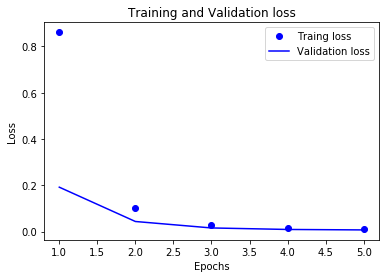

In [129]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Traing loss')
plt.plot(epochs,val_loss,'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

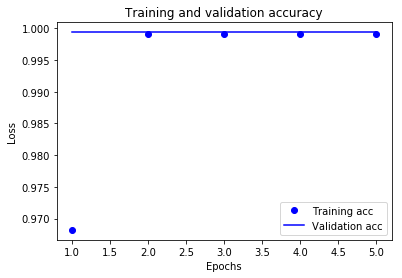

In [130]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label= 'Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Testing  the model

In [135]:
results = model.evaluate(x_test,one_hot_test_labels)
results

5000/5000 [==============================] - 1s 133us/step


[0.010893774043169106, 0.9992]